In [5]:
import os, sys, random, copy
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, Dropout, 
                                     Flatten, MaxPooling2D)
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
sys.path.append('../')

In [70]:
from utils.misc import contrivedLabel, plotLabel, summaryStats, bagData

In [12]:
from models.model import ModelBuilder

here we build a "contrived-label" - a numerical target with some connection to the image data to train out models on. 

First we build min/max x/y coord where a pixel value is non-zero.

This should help us figure out a pattern for predicting point(s) from images.

### Build Data

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [22]:
# build contrived label
ret_type = 'min_y'

y_train_2 = np.array(
                [contrivedLabel(_img, ret=ret_type) for _img in x_train]
                ,dtype='uint8'
                )
y_test_2 = np.array(
                [contrivedLabel(_img, ret=ret_type) for _img in x_test]
                ,dtype='uint8'
                )

In [11]:
y_train_2[:4], y_test_2[:4]

(array([5, 4, 5, 5], dtype=uint8), array([7, 3, 4, 4], dtype=uint8))

### Explore Data

21707


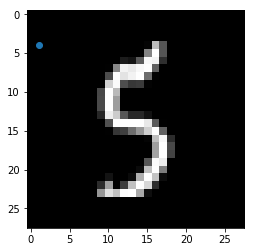

114


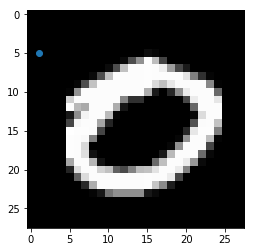

7895


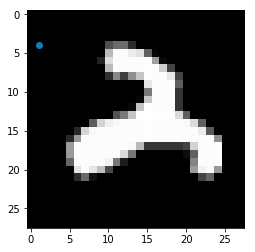

38829


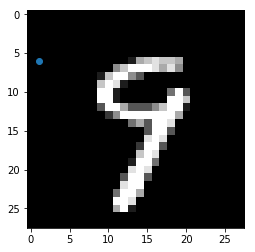

7606


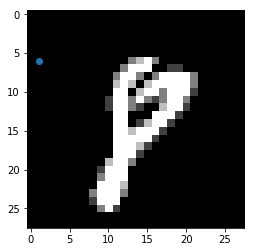

In [15]:
# plot the contrived label onto the image
# note: change plotLabel(y=) ->plotLabel(x=) or plotLabel(point=)
N=5
IMG_DATASET = x_train
TRUTH_DATASET = y_train_2

for _i in random.sample(range(len(IMG_DATASET)), N):
    print(_i)
    plotLabel(IMG_DATASET[_i], y = TRUTH_DATASET[_i])

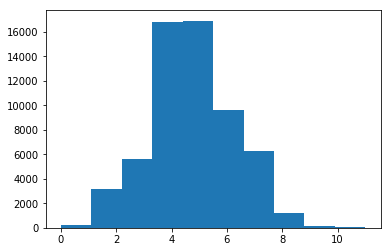

(array([  45.,  541.,  867., 2902., 2837., 1570., 1043.,  169.,   21.,
           5.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

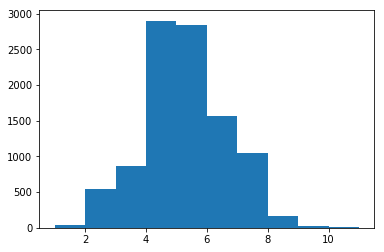

In [23]:
plt.hist(y_train_2, bins=10 )
plt.show()
plt.hist(y_test_2, bins=10 )

In [27]:
summaryStats(y_train_2)
print('---------------')
summaryStats(y_test_2)

mean y      : 4.8
mean abs err: 1.11
mean sq err:  1.98
---------------
mean y      : 4.78
mean abs err: 1.1
mean sq err:  1.92


### Build Models

In [103]:
from models.model import ModelBuilder

In [104]:
mb = ModelBuilder()

In [105]:
x_train_norm = mb.normData(x_train)
x_test_norm = mb.normData(x_test)

In [106]:
input_shape = x_train_norm[0].shape
mb.setInputShape(input_shape)
print(mb.inputShape)

(28, 28, 1)


##### Bag Data

In [107]:
x_bag_train = bagData(x_train_norm)
y2_bag_train = bagData(y_train_2)

10 6000 6000
10 6000 6000


In [108]:
print(mb.k)
mb.buildModel()
BAG=1
mb.fitModel(x=x_bag_train[BAG], y=y2_bag_train[BAG], epochs=1)

0
6000/6000 [==============================] - 5s 754us/sample - loss: 2549.8976 - mean_absolute_error: 11.2088 - mean_squared_error: 2549.8977


In [109]:
print(mb.k)
mb.buildModel()
BAG=1
mb.fitModel(x=x_bag_train[BAG], y=y2_bag_train[BAG], epochs=5)

1
Epoch 1/5
6000/6000 [==============================] - 4s 712us/sample - loss: 2337.2771 - mean_absolute_error: 7.7120 - mean_squared_error: 2337.2778
Epoch 2/5
6000/6000 [==============================] - 4s 679us/sample - loss: 3.5323 - mean_absolute_error: 1.4081 - mean_squared_error: 3.5323
Epoch 3/5
6000/6000 [==============================] - 4s 669us/sample - loss: 2.4581 - mean_absolute_error: 1.2226 - mean_squared_error: 2.4581
Epoch 4/5
6000/6000 [==============================] - 4s 674us/sample - loss: 2.1260 - mean_absolute_error: 1.1125 - mean_squared_error: 2.1260
Epoch 5/5
6000/6000 [==============================] - 4s 676us/sample - loss: 1.7833 - mean_absolute_error: 1.0291 - mean_squared_error: 1.7833


In [110]:
print(mb.k)
mb.buildModel()
BAG=1
mb.fitModel(x=x_bag_train[BAG], y=y2_bag_train[BAG], epochs=10)

2
Epoch 1/10
6000/6000 [==============================] - 4s 712us/sample - loss: 1223.4268 - mean_absolute_error: 7.9403 - mean_squared_error: 1223.4271
Epoch 2/10
6000/6000 [==============================] - 4s 682us/sample - loss: 2.8565 - mean_absolute_error: 1.2993 - mean_squared_error: 2.8565
Epoch 3/10
6000/6000 [==============================] - 4s 689us/sample - loss: 2.2608 - mean_absolute_error: 1.1541 - mean_squared_error: 2.2608
Epoch 4/10
6000/6000 [==============================] - 4s 688us/sample - loss: 2.0485 - mean_absolute_error: 1.0789 - mean_squared_error: 2.0485
Epoch 5/10
6000/6000 [==============================] - 4s 693us/sample - loss: 1.6260 - mean_absolute_error: 0.9972 - mean_squared_error: 1.6260 - loss: 1.5927 - me
Epoch 6/10
6000/6000 [==============================] - 4s 701us/sample - loss: 1.5269 - mean_absolute_error: 0.9585 - mean_squared_error: 1.5269
Epoch 7/10
6000/6000 [==============================] - 4s 716us/sample - loss: 1.4295 - mean_ab

In [115]:
history = mb.history.copy()

In [116]:
from IPython.display import display

In [118]:
for _hist in history.values():
    display(pd.DataFrame(_hist.history))

,loss,mean_absolute_error,mean_squared_error
0,2549.897563,11.208786,2549.897705


,loss,mean_absolute_error,mean_squared_error
0,2337.277104,7.711984,2337.277832
1,3.532317,1.408132,3.532316
2,2.458113,1.222613,2.458113
3,2.126035,1.112461,2.126035
4,1.783316,1.029139,1.783316


,loss,mean_absolute_error,mean_squared_error
0,1223.426801,7.940252,1223.427124
1,2.856493,1.299265,2.856494
2,2.260845,1.154134,2.260845
3,2.048519,1.078905,2.048520
4,1.626040,0.997235,1.626040
5,1.526887,0.958457,1.526886
6,1.429531,0.934326,1.429532
7,1.362200,0.903909,1.362200
8,1.279481,0.872333,1.279481
9,1.298186,0.877830,1.298186


In [121]:
history1.history

{'loss': [2549.8975629517236],
 'mean_absolute_error': [11.208786],
 'mean_squared_error': [2549.8977]}

In [131]:
from models.model import ModelBuilder

In [137]:
mb2 = ModelBuilder()

In [135]:
BAG=1

In [138]:
print(mb2.k)
mb2.setInputShape(input_shape)
mb2.buildModel()
mb2.fitModel(x=x_bag_train[BAG], y=y2_bag_train[BAG], epochs=5, 
        validation_split = 0.0)

print(mb2.k)
mb2.setInputShape(input_shape)
mb2.buildModel()
mb2.fitModel(x=x_bag_train[BAG], y=y2_bag_train[BAG], epochs=5, 
        validation_split = 0.2)

0
Epoch 1/5
6000/6000 [==============================] - 5s 752us/sample - loss: 2832.4824 - mean_absolute_error: 9.3280 - mean_squared_error: 2832.48020s - loss: 3539.6495 - mean_absolute_error: 11.2825 - mean_squared_error - ETA: 0s - loss: 3017.4010 - mean_absolute_error: 9.8585 - mean_squared_error:
Epoch 2/5
6000/6000 [==============================] - 4s 730us/sample - loss: 3.2163 - mean_absolute_error: 1.3750 - mean_squared_error: 3.2163
Epoch 3/5
6000/6000 [==============================] - 5s 752us/sample - loss: 2.2812 - mean_absolute_error: 1.1828 - mean_squared_error: 2.2812
Epoch 4/5
6000/6000 [==============================] - 5s 758us/sample - loss: 1.9302 - mean_absolute_error: 1.0923 - mean_squared_error: 1.9302
Epoch 5/5
6000/6000 [==============================] - 4s 736us/sample - loss: 1.7400 - mean_absolute_error: 1.0404 - mean_squared_error: 1.7400
1
Train on 4800 samples, validate on 1200 samples
Epoch 1/5
4800/4800 [==============================] - 4s 915us/s

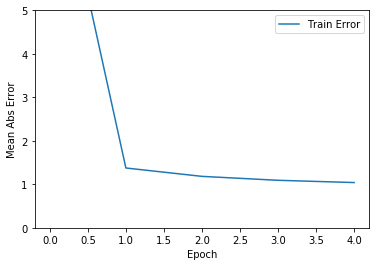

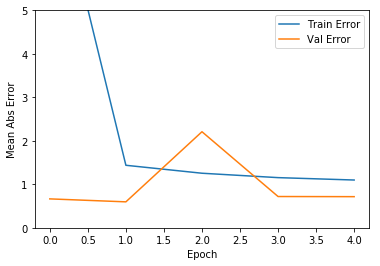

In [141]:
mb2.plotHistory(list(mb2.history.values())[0])
mb2.plotHistory(list(mb2.history.values())[1])

In [158]:
x_bag3 = bagData(x_train_norm, N=3)
y_bag3 = bagData(y_train_2, N=3)

3 20000 20000
3 20000 20000


In [160]:
mb3 = ModelBuilder()

In [161]:
BAG = 2
print(mb3.k)
mb3.setInputShape(input_shape)
mb3.buildModel()
mb3.fitModel(x=x_bag_train[BAG], y=y2_bag_train[BAG], epochs=10, 
        validation_split = 0.2)

0
Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 4s 822us/sample - loss: 3832.2147 - mean_absolute_error: 9.6473 - mean_squared_error: 3832.2139 - val_loss: 2.3874 - val_mean_absolute_error: 1.3064 - val_mean_squared_error: 2.3874
Epoch 2/10
4800/4800 [==============================] - 4s 760us/sample - loss: 4.2535 - mean_absolute_error: 1.5560 - mean_squared_error: 4.2535 - val_loss: 1.0950 - val_mean_absolute_error: 0.8549 - val_mean_squared_error: 1.0950
Epoch 3/10
4800/4800 [==============================] - 4s 792us/sample - loss: 3.0873 - mean_absolute_error: 1.3678 - mean_squared_error: 3.0873 - val_loss: 0.6301 - val_mean_absolute_error: 0.6018 - val_mean_squared_error: 0.6301
Epoch 4/10
4800/4800 [==============================] - 4s 791us/sample - loss: 2.3309 - mean_absolute_error: 1.1819 - mean_squared_error: 2.3309 - val_loss: 0.5451 - val_mean_absolute_error: 0.5467 - val_mean_squared_error: 0.5451
Epoch 5/10
4800/

In [162]:
BAG=0
print(mb3.k)
mb3.setInputShape(input_shape)
mb3.buildModel()
mb3.fitModel(x=x_bag3[BAG], y=y_bag3[BAG], epochs=10, 
        validation_split = 0.2)

1
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 12s 778us/sample - loss: 1971.2892 - mean_absolute_error: 5.2528 - mean_squared_error: 1971.2888 - val_loss: 0.5093 - val_mean_absolute_error: 0.5216 - val_mean_squared_error: 0.5093
Epoch 2/10
16000/16000 [==============================] - 12s 760us/sample - loss: 2.1177 - mean_absolute_error: 1.1403 - mean_squared_error: 2.1177 - val_loss: 0.6389 - val_mean_absolute_error: 0.6161 - val_mean_squared_error: 0.6389
Epoch 3/10
16000/16000 [==============================] - 12s 750us/sample - loss: 1.5692 - mean_absolute_error: 0.9773 - mean_squared_error: 1.5692 - val_loss: 0.7221 - val_mean_absolute_error: 0.6930 - val_mean_squared_error: 0.7221
Epoch 4/10
16000/16000 [==============================] - 12s 758us/sample - loss: 1.3370 - mean_absolute_error: 0.9017 - mean_squared_error: 1.3370 - val_loss: 0.8250 - val_mean_absolute_error: 0.7393 - val_mean_squared_error: 0.8250
Epo

In [164]:
summaryStats(y2_bag_train[2])

mean y      : 4.85
mean abs err: 1.1
mean sq err:  1.96


In [166]:
summaryStats(y_bag3[0])

mean y      : 4.81
mean abs err: 1.11
mean sq err:  1.96


In [167]:
models = mb3.models.copy()
history = mb3.history.copy()

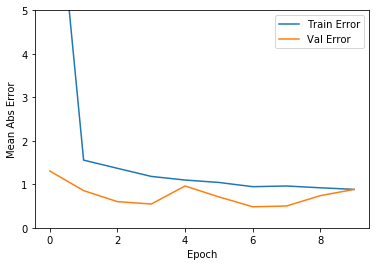

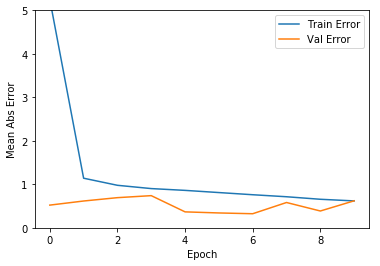

In [169]:
#history plots
for _hist in history.values():
    mb3.plotHistory(_hist)

In [ ]:
#eval:

In [172]:
mb3.eval(models['0'], x_test_norm, y_test_2)

[0.9811619395256043, 0.84236133, 0.98116213]

In [174]:
mb3.eval(models['1'], x_test_norm, y_test_2)

[0.4931590620994568, 0.61368436, 0.4931591]

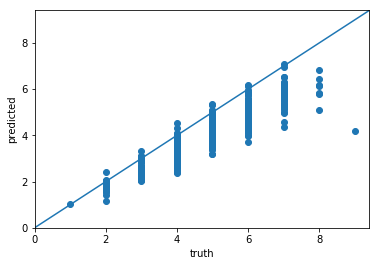

In [177]:
#do actualsvs predicted
MODEL='0'
N=500
predicted = models[MODEL].predict(x_test_norm[:N])
truth = y_test_2[:N]
mb3.plotPredVsActual(None, truth, predicted)

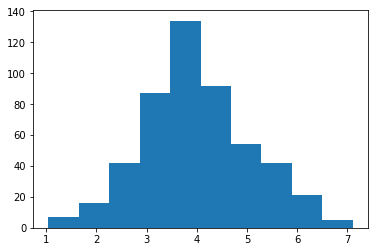

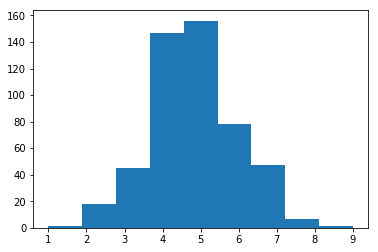

In [181]:
plt.hist(predicted)
plt.show()
plt.hist(truth, bins=9)
plt.show()

In [185]:
summaryStats(truth)

mean y      : 4.8
mean abs err: 1.01
mean sq err:  1.66


In [183]:
summaryStats([x[0] for x in predicted])

mean y      : 3.99
mean abs err: 0.84
mean sq err:  1.16


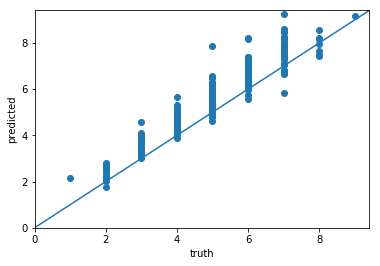

In [186]:
MODEL='1'
N=500
predicted = models[MODEL].predict(x_test_norm[:N])
truth = y_test_2[:N]
mb3.plotPredVsActual(None, truth, predicted)

In [191]:
mb4 = ModelBuilder()

In [192]:
x_bag2 = bagData(x_train_norm, N=2)
y_bag2 = bagData(y_train_2, N=2)
# x_bag1 = bagData(x_train_norm, N=1)
# y_bag1 = bagData(y_train_2, N=1)
BAG=0

mb4.setInputShape(input_shape)

print(mb4.k)
mb4.buildModel()
mb4.fitModel(x=x_train_norm, y=y_train_2, epochs=10, 
        validation_split = 0.2)

print(mb4.k)
mb4.buildModel()
mb4.fitModel(x=x_train_norm, y=y_train_2, epochs=50, 
        validation_split = 0.2)

print(mb4.k)
mb4.buildModel()
mb4.fitModel(x=x_bag2[BAG], y=y_bag2[BAG], epochs=10, 
        validation_split = 0.2)

print(mb4.k)
mb4.buildModel()
mb4.fitModel(x=x_bag2[BAG], y=y_bag2[BAG], epochs=50, 
        validation_split = 0.2)


2 30000 30000
2 30000 30000
0
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 38s 788us/sample - loss: 280.2073 - mean_absolute_error: 1.9936 - mean_squared_error: 280.2076 - val_loss: 0.9615 - val_mean_absolute_error: 0.8750 - val_mean_squared_error: 0.9615
Epoch 2/10
48000/48000 [==============================] - 39s 803us/sample - loss: 1.0280 - mean_absolute_error: 0.7858 - mean_squared_error: 1.0280 - val_loss: 0.2380 - val_mean_absolute_error: 0.3671 - val_mean_squared_error: 0.2380
Epoch 3/10
48000/48000 [==============================] - 39s 804us/sample - loss: 0.6835 - mean_absolute_error: 0.6359 - mean_squared_error: 0.6835 - val_loss: 0.1183 - val_mean_absolute_error: 0.2538 - val_mean_squared_error: 0.1183
Epoch 4/10
48000/48000 [==============================] - 42s 874us/sample - loss: 0.5219 - mean_absolute_error: 0.5343 - mean_squared_error: 0.5219 - val_loss: 0.0809 - val_mean_absolute_error: 0.1983 - val_mea

48000/48000 [==============================] - 34s 718us/sample - loss: 0.1305 - mean_absolute_error: 0.2397 - mean_squared_error: 0.1305 - val_loss: 0.0540 - val_mean_absolute_error: 0.1601 - val_mean_squared_error: 0.0540
Epoch 26/50
48000/48000 [==============================] - 36s 750us/sample - loss: 0.1222 - mean_absolute_error: 0.2366 - mean_squared_error: 0.1222 - val_loss: 0.0717 - val_mean_absolute_error: 0.1626 - val_mean_squared_error: 0.0717
Epoch 27/50
48000/48000 [==============================] - 3296s 69ms/sample - loss: 0.1221 - mean_absolute_error: 0.2360 - mean_squared_error: 0.1221 - val_loss: 0.0434 - val_mean_absolute_error: 0.1297 - val_mean_squared_error: 0.0434
Epoch 28/50
48000/48000 [==============================] - 35s 726us/sample - loss: 0.1198 - mean_absolute_error: 0.2353 - mean_squared_error: 0.1198 - val_loss: 0.0803 - val_mean_absolute_error: 0.2115 - val_mean_squared_error: 0.0803
Epoch 29/50
48000/48000 [==============================] - 35s 724u

KeyboardInterrupt: 

In [193]:
models4 = mb4.models.copy()


In [194]:
models4.keys()

dict_keys(['0', '1'])

In [195]:
adv_model = models4['1']

In [204]:
basic_model = models['0']

In [208]:
# training
print(
'--train-----', '\n',
mb4.eval(basic_model, x_train_norm, y_train_2), '\n',
mb4.eval(adv_model, x_train_norm, y_train_2), '\n',
'---test-----', '\n',
mb4.eval(basic_model, x_test_norm, y_test_2), '\n',
mb4.eval(adv_model, x_test_norm, y_test_2)
)

--train----- 
 [0.9679938070933024, 0.8344772, 0.96799505] 
 [0.06281089935998121, 0.16024902, 0.06281089] 
 ---test----- 
 [0.9811619395256043, 0.84236133, 0.98116213] 
 [0.06496722619831562, 0.16013144, 0.06496722]


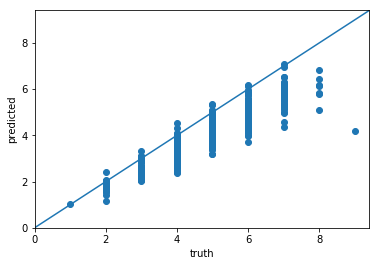

In [210]:
N=500
mod = basic_model
truth = y_test_2[:N]
predicted = mod.predict(x_test_norm[:N])
predicted = [x[0] for x in predicted]
mb4.plotPredVsActual(None, truth, predicted)

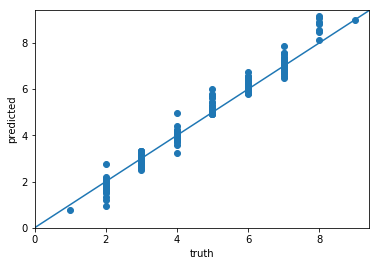

In [209]:
N=500
mod = adv_model
truth = y_test_2[:N]
predicted = mod.predict(x_test_norm[:N])
predicted = [x[0] for x in predicted]
mb4.plotPredVsActual(None, truth, predicted)

In [ ]:
history4 = mb4.history.copy()

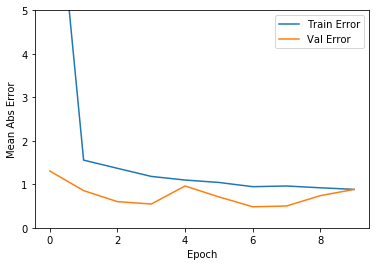

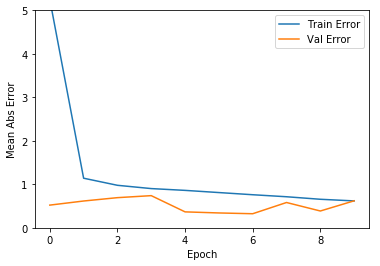

In [211]:
for _hist in history.values():
    mb4.plotHistory(_hist)

In [212]:
hist_list = list(history.values())

In [213]:
hist0 = hist_list[0]

In [215]:
pd.DataFrame(hist0.history)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,3832.214706,9.647273,3832.213867,2.387397,1.306417,2.387398
1,4.253547,1.555969,4.253547,1.094951,0.854919,1.094951
2,3.087347,1.367779,3.087348,0.630101,0.601812,0.630101
3,2.330873,1.181908,2.330872,0.545124,0.546722,0.545124
4,1.976628,1.097969,1.976627,1.235983,0.961210,1.235983
5,1.768159,1.042691,1.768159,0.784334,0.710511,0.784334
6,1.539363,0.945572,1.539363,0.413437,0.483545,0.413437
7,1.505212,0.961196,1.505213,0.501270,0.501311,0.501270
8,1.382120,0.920027,1.382121,0.816657,0.739139,0.816657
9,1.270683,0.883676,1.270683,1.098496,0.882444,1.098496


In [216]:
hist1 = hist_list[1]
pd.DataFrame(hist1.history)

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
0,1971.289234,5.252799,1971.288818,0.509307,0.521601,0.509307
1,2.117728,1.140291,2.117729,0.638934,0.616086,0.638934
2,1.569230,0.977310,1.569231,0.722065,0.693002,0.722065
3,1.336968,0.901729,1.336967,0.824981,0.739348,0.824981
4,1.254712,0.860532,1.254711,0.255094,0.366353,0.255094
5,1.121932,0.810294,1.121932,0.225281,0.341383,0.225281
6,1.173124,0.760388,1.173125,0.188458,0.323551,0.188458
7,0.864224,0.714012,0.864225,0.456263,0.581648,0.456263
8,0.751972,0.656016,0.751972,0.243467,0.386276,0.243467
9,0.689049,0.618417,0.689049,0.504182,0.620642,0.504182


In [217]:
hist1.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
BAG = 6
print(mb4.k)
mb4.buildModel()
mb4.fitModel(x=x_bag_train[BAG], y=y2_bag_train[BAG], epochs=30, 
        validation_split = 0.2)

3
Train on 4800 samples, validate on 1200 samples
Epoch 1/30
4800/4800 [==============================] - 5s 942us/sample - loss: 3911.8791 - mean_absolute_error: 10.4626 - mean_squared_error: 3911.8799 - val_loss: 2.1672 - val_mean_absolute_error: 0.9788 - val_mean_squared_error: 2.1672
Epoch 2/30
4160/4800 [=========================>....] - ETA: 0s - loss: 3.7813 - mean_absolute_error: 1.4939 - mean_squared_error: 3.7813